<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

Age  Attrition  ... YearsWithCurrManager  ID
0   41          1  ...                    5   0
1   49          0  ...                    7   1
2   37          1  ...                    0   2
3   33          0  ...                    0   3
4   27          0  ...                    2   4

[5 rows x 34 columns]

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
attrition_data.describe()

Age    Attrition  ...  YearsWithCurrManager           ID
count  1028.000000  1028.000000  ...           1028.000000  1028.000000
mean     36.999027     0.167315  ...              4.141051   513.500000
std       9.444297     0.373439  ...              3.608460   296.902341
min      18.000000     0.000000  ...              0.000000     0.000000
25%      30.000000     0.000000  ...              2.000000   256.750000
50%      36.000000     0.000000  ...              3.000000   513.500000
75%      43.000000     0.000000  ...              7.000000   770.250000
max      60.000000     1.000000  ...             17.000000  1027.000000

[8 rows x 27 columns]

In [6]:
attrition_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

There is **no missing data** in this dataset. This is really good news 




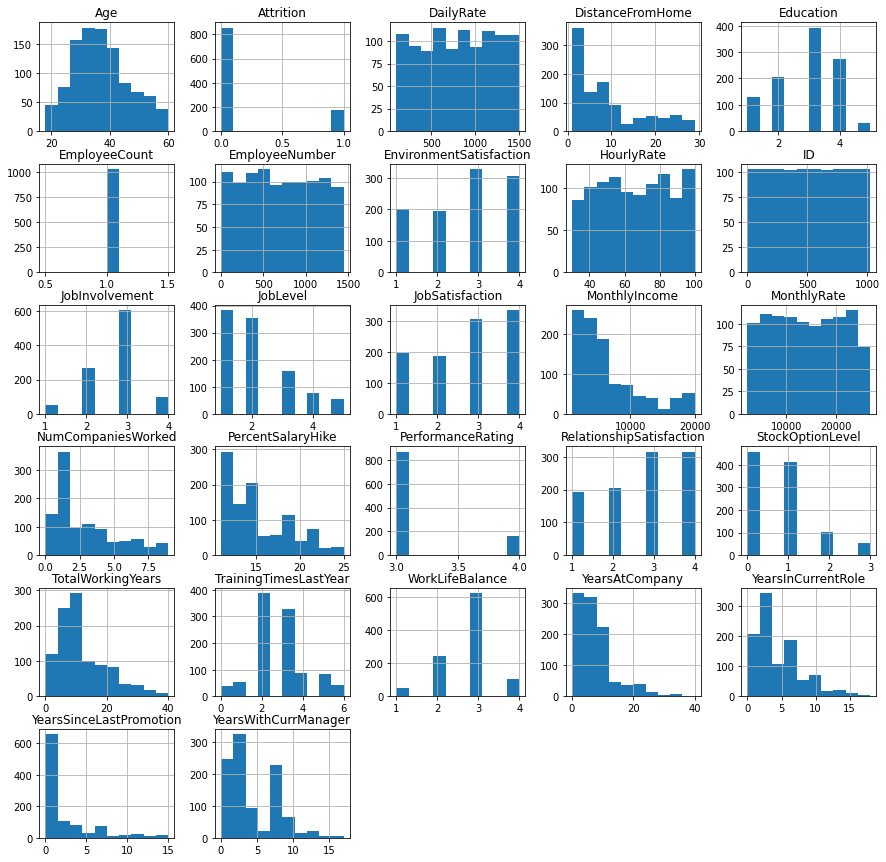

In [7]:
attrition_data.hist(figsize=(15,15));

In [8]:
attrition_data.EmployeeCount.value_counts()

1    1028
Name: EmployeeCount, dtype: int64

In [9]:
len(attrition_data.EmployeeNumber.unique())

1028

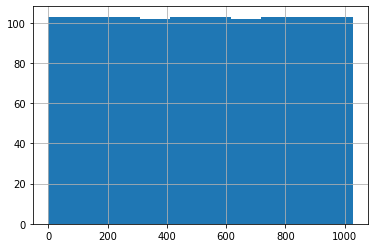

In [10]:
attrition_data.ID.hist();

These three are absolutely useless. **ID** an **Employee Number** is just unique for every employee and the **employee count** is constantly 1 for all the data points.

In [0]:
X = attrition_data.drop(['ID','EmployeeCount', 'Attrition', 'EmployeeNumber'], axis = 1)
y = attrition_data['Attrition']

0    856
1    172
Name: Attrition, dtype: int64

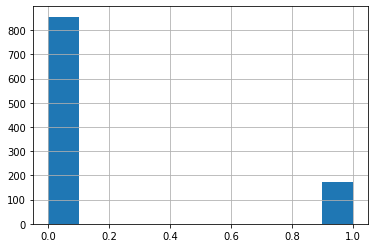

In [12]:
y.hist();
y.value_counts()

The column Attrition which is also the target variable has a class imbalance. 172 1s and 856 0s. So it is important to **split the data in the stratified way** such that contribution of each class is same in test and train.Since there are only two categories any transform on the data wont help much. 

It is important in machine learning that the model should never have seen the data we test on. So it is important to seperate the data befor applying any inds of transforms or imputations. If we are not doing so, the value we impute may be affected by test data, thus it may reduce the models generelization 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape)

(822, 30)


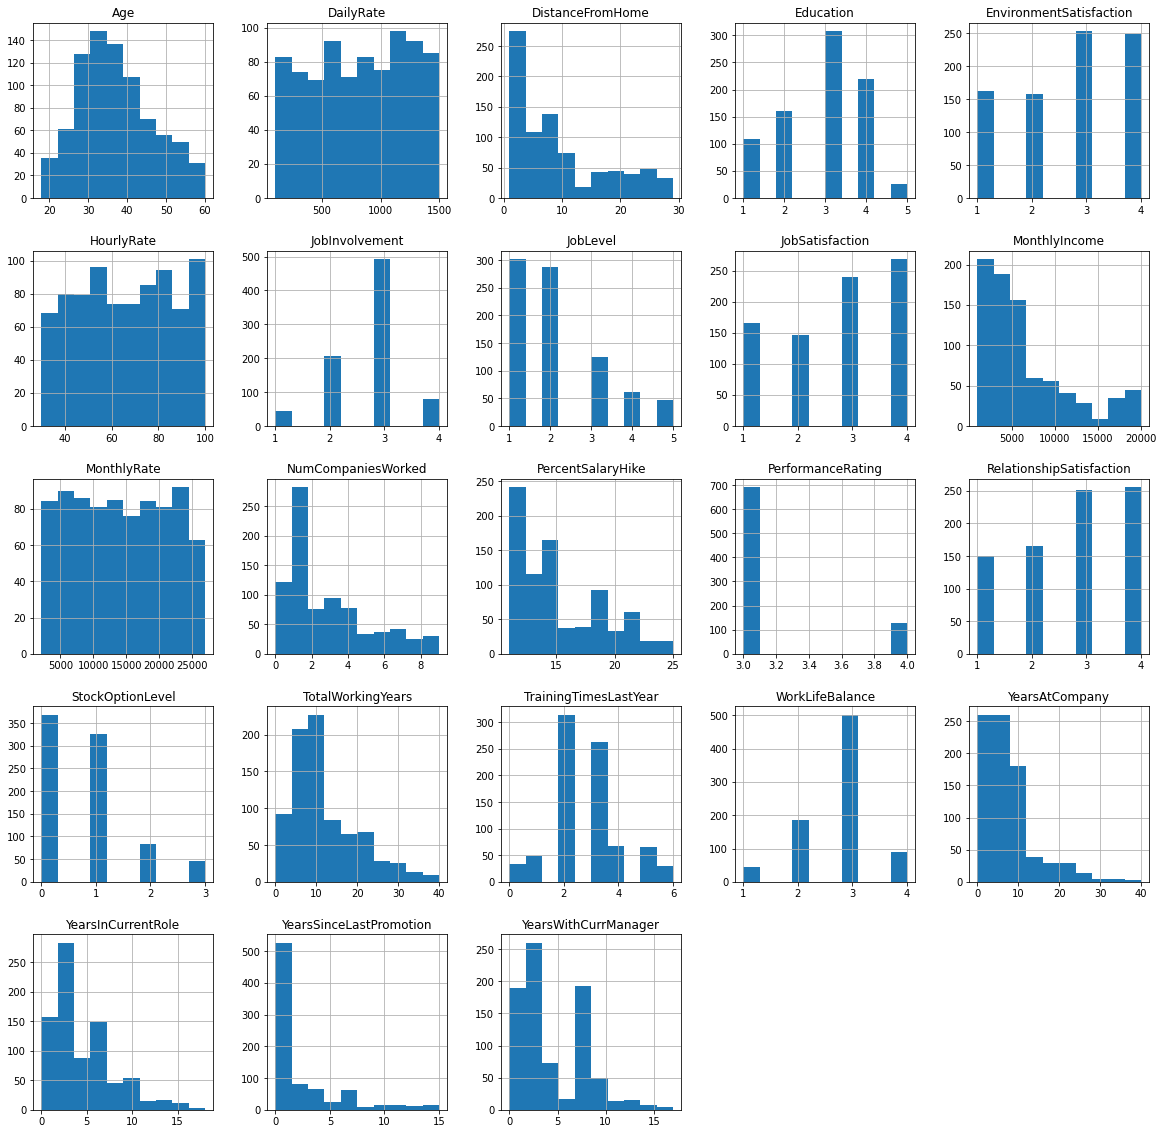

In [17]:
X_train.hist(figsize=(20,20));

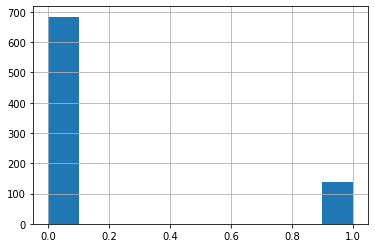

In [18]:
y_train.hist();

Now lets analyse the  variables one by one
# Analysing Categorical variables


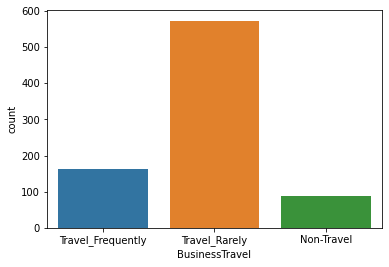

In [19]:
sns.countplot(x="BusinessTravel", data=X_train)

Attrition            0   1
BusinessTravel            
Non-Travel          79   8
Travel_Frequently  120  42
Travel_Rarely      485  88


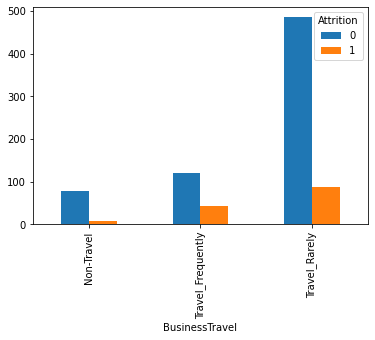

In [20]:
ct = pd.crosstab( X_train["BusinessTravel"],y_train)
print(ct)
ct.plot.bar()

In [21]:
print(ct[0].sum())
print(ct[1].sum())

684
138


As seen before there is a class imbalance. So lets divide the value by total number in that particular class (Here no of attrition and not attrtion in train data set) 

Attrition                 0         1
BusinessTravel                       
Non-Travel         0.115497  0.057971
Travel_Frequently  0.175439  0.304348
Travel_Rarely      0.709064  0.637681


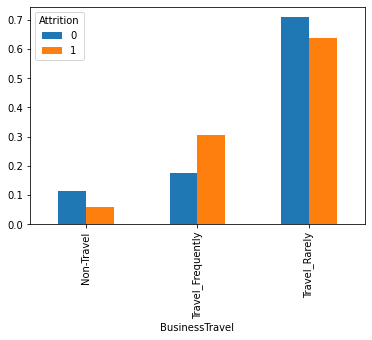

In [25]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

Now we hava a better over view on the data

No clear conclusions but will help the model.For Business Travel Label encoder can be used as its more or less ordinal categories.

In [0]:
from sklearn import preprocessing
busi = preprocessing.LabelEncoder()
busi.fit(X_train["BusinessTravel"])
busi_tra = busi.transform(X_train["BusinessTravel"])
X_train["BusinessTravel_tra"] = busi_tra.copy()
X_train = X_train.drop(columns=["BusinessTravel"]) 

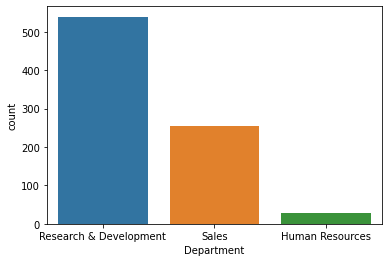

In [27]:
sns.countplot(x="Department", data=X_train)

Attrition                 0   1
Department                     
Human Resources          24   4
Research & Development  453  86
Sales                   207  48


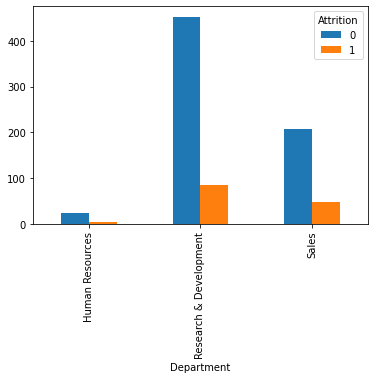

In [28]:
ct = pd.crosstab( X_train["Department"],y_train)
print(ct)
ct.plot.bar()

Attrition                      0         1
Department                                
Human Resources         0.035088  0.028986
Research & Development  0.662281  0.623188
Sales                   0.302632  0.347826


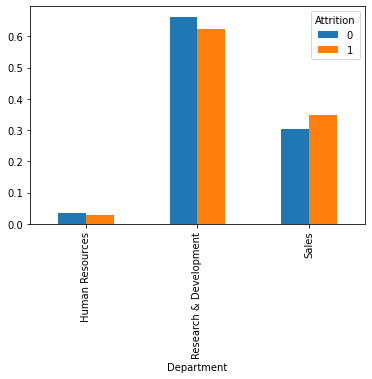

In [29]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

No clear conclusions but will help the model. For Department one 

---

hot encoding can be preferred.  

In [0]:
cat_Dep = pd.get_dummies(X_train['Department'], prefix='Department')
X_train = pd.concat([X_train, cat_Dep], axis=1)
X_train = X_train.drop(columns=["Department"]) 

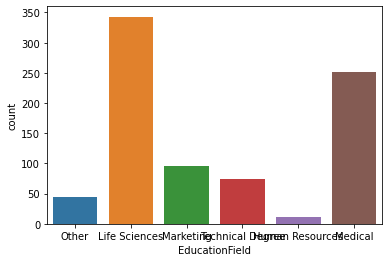

In [31]:
sns.countplot(x="EducationField", data=X_train)

Attrition           0   1
EducationField           
Human Resources    10   2
Life Sciences     288  55
Marketing          78  18
Medical           216  36
Other              36   9
Technical Degree   56  18


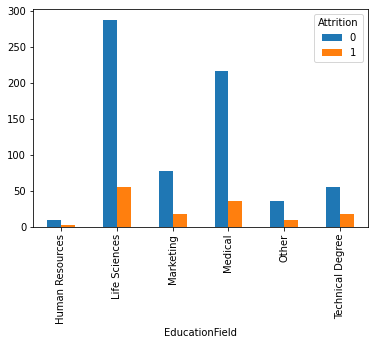

In [32]:
ct = pd.crosstab( X_train["EducationField"],y_train)
print(ct)
ct.plot.bar()

Attrition                0         1
EducationField                      
Human Resources   0.014620  0.014493
Life Sciences     0.421053  0.398551
Marketing         0.114035  0.130435
Medical           0.315789  0.260870
Other             0.052632  0.065217
Technical Degree  0.081871  0.130435


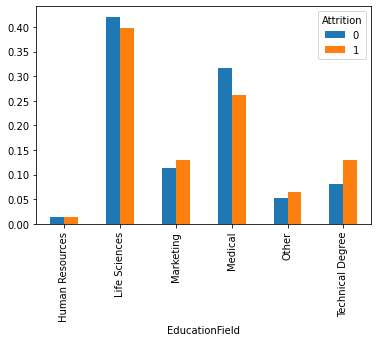

In [33]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

No clear conclusions but will help the model. For EducationField one hot encoding will raise the number of parameters a lot. And this is not helping a lot. SO   

In [0]:
educ = preprocessing.LabelEncoder()
educ.fit(X_train["EducationField"])
educ_tra = educ.transform(X_train["EducationField"])
X_train["EducationField_tra"] = educ_tra.copy()
X_train = X_train.drop(columns=["EducationField"]) 

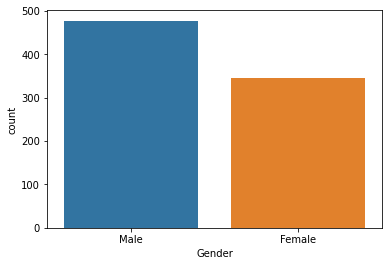

In [35]:
sns.countplot(x="Gender", data=X_train)

Attrition    0   1
Gender            
Female     292  53
Male       392  85


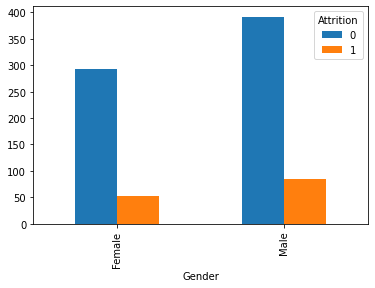

In [36]:
ct = pd.crosstab( X_train["Gender"],y_train)
print(ct)
ct.plot.bar()

Attrition         0         1
Gender                       
Female     0.426901  0.384058
Male       0.573099  0.615942


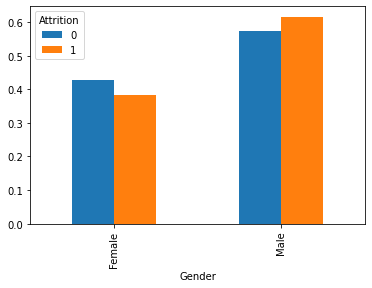

In [37]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

No conclusive information

In [0]:
gend = preprocessing.LabelEncoder()
gend.fit(X_train["Gender"])
gend_tra = gend.transform(X_train["Gender"])
X_train["Gender_tra"] = gend_tra.copy()
X_train = X_train.drop(columns=["Gender"]) 

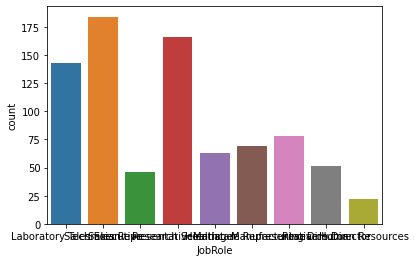

In [39]:
sns.countplot(x="JobRole", data=X_train)

Attrition                    0   1
JobRole                           
Healthcare Representative   62   7
Human Resources             18   4
Laboratory Technician      106  37
Manager                     59   4
Manufacturing Director      73   5
Research Director           49   2
Research Scientist         133  33
Sales Executive            155  29
Sales Representative        29  17


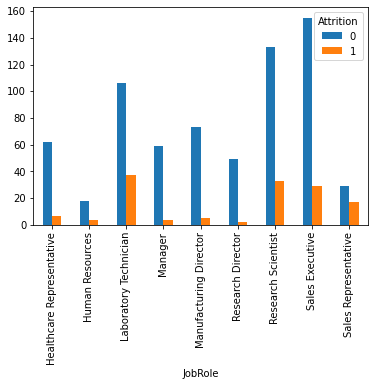

In [40]:
ct = pd.crosstab( X_train["JobRole"],y_train)
print(ct)
ct.plot.bar()

Attrition                         0         1
JobRole                                      
Healthcare Representative  0.090643  0.050725
Human Resources            0.026316  0.028986
Laboratory Technician      0.154971  0.268116
Manager                    0.086257  0.028986
Manufacturing Director     0.106725  0.036232
Research Director          0.071637  0.014493
Research Scientist         0.194444  0.239130
Sales Executive            0.226608  0.210145
Sales Representative       0.042398  0.123188


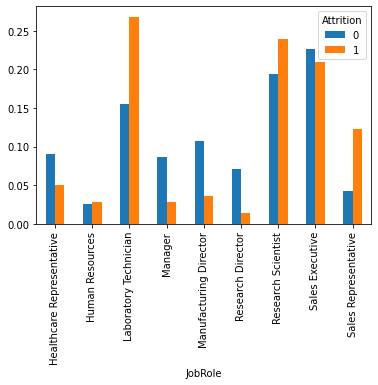

In [41]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

Chances are high if you are a sales rep(relativly) , lab technician . Research scientist and sales executives are next in the line.

In [42]:
X_train['JobRole'].unique()

array(['Laboratory Technician', 'Sales Executive', 'Sales Representative',
       'Research Scientist', 'Manager', 'Healthcare Representative',
       'Manufacturing Director', 'Research Director', 'Human Resources'],
      dtype=object)

In [0]:
cat_job = pd.get_dummies(X_train['JobRole'], prefix='JobRole')
X_train = pd.concat([X_train, cat_job[['JobRole_Laboratory Technician', 'JobRole_Sales Executive', 'JobRole_Sales Representative','JobRole_Research Scientist']]], axis=1)
X_train = X_train.drop(columns=["JobRole"]) 

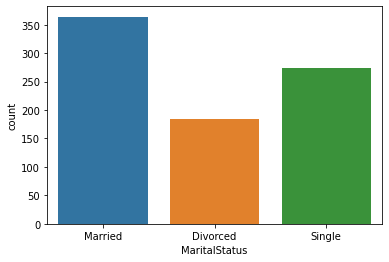

In [44]:
sns.countplot(x="MaritalStatus", data=X_train)

Attrition        0   1
MaritalStatus         
Divorced       166  19
Married        317  47
Single         201  72


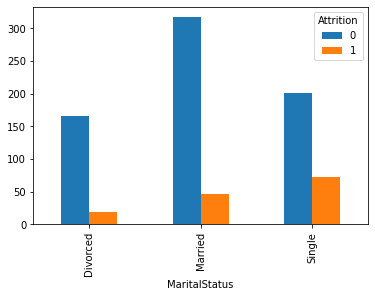

In [45]:
ct = pd.crosstab( X_train["MaritalStatus"],y_train)
print(ct)
ct.plot.bar()

Attrition            0         1
MaritalStatus                   
Divorced       0.24269  0.137681
Married        0.46345  0.340580
Single         0.29386  0.521739


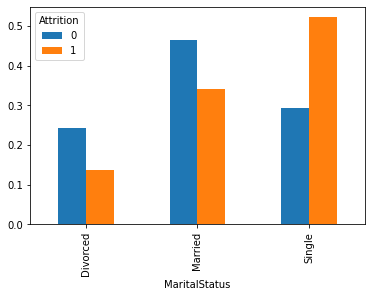

In [46]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

Single people are likly to be attriterated. Distribution is similar for divorced and married. so lets just see if the guy is single or not. So label encoder

In [0]:
mari = preprocessing.LabelEncoder()
mari.fit(X_train["MaritalStatus"])
mari_tra = mari.transform(X_train["MaritalStatus"])
X_train["MaritalStatus_tra"] = mari_tra.copy()
X_train = X_train.drop(columns=["MaritalStatus"]) 

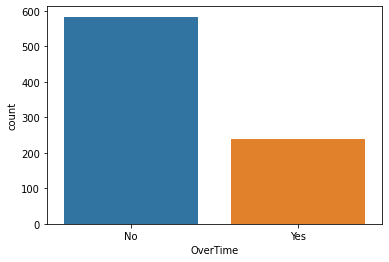

In [48]:
sns.countplot(x="OverTime", data=X_train)

Attrition    0   1
OverTime          
No         521  62
Yes        163  76


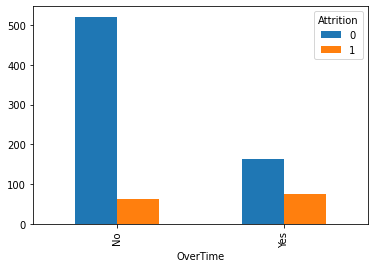

In [49]:
ct = pd.crosstab( X_train["OverTime"],y_train)
print(ct)
ct.plot.bar()

Attrition         0         1
OverTime                     
No         0.761696  0.449275
Yes        0.238304  0.550725


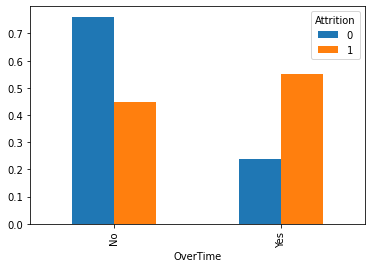

In [50]:
ct_new = ct.copy()
ct_new[0] = ct_new[0]/ ct[0].sum()
ct_new[1] = ct_new[1]/ ct[1].sum()
print(ct_new)
ct_new.plot.bar()

In [0]:
over = preprocessing.LabelEncoder()
over.fit(X_train["OverTime"])
over_tra = over.transform(X_train["OverTime"])
X_train["OverTime_tra"] = over_tra.copy()
X_train = X_train.drop(columns=["OverTime"]) 

People doing overtime has more chances of attrition. Label encoding for this

# Numerical variables

In [0]:
train_data = X_train.copy()
train_data['target'] = y_train

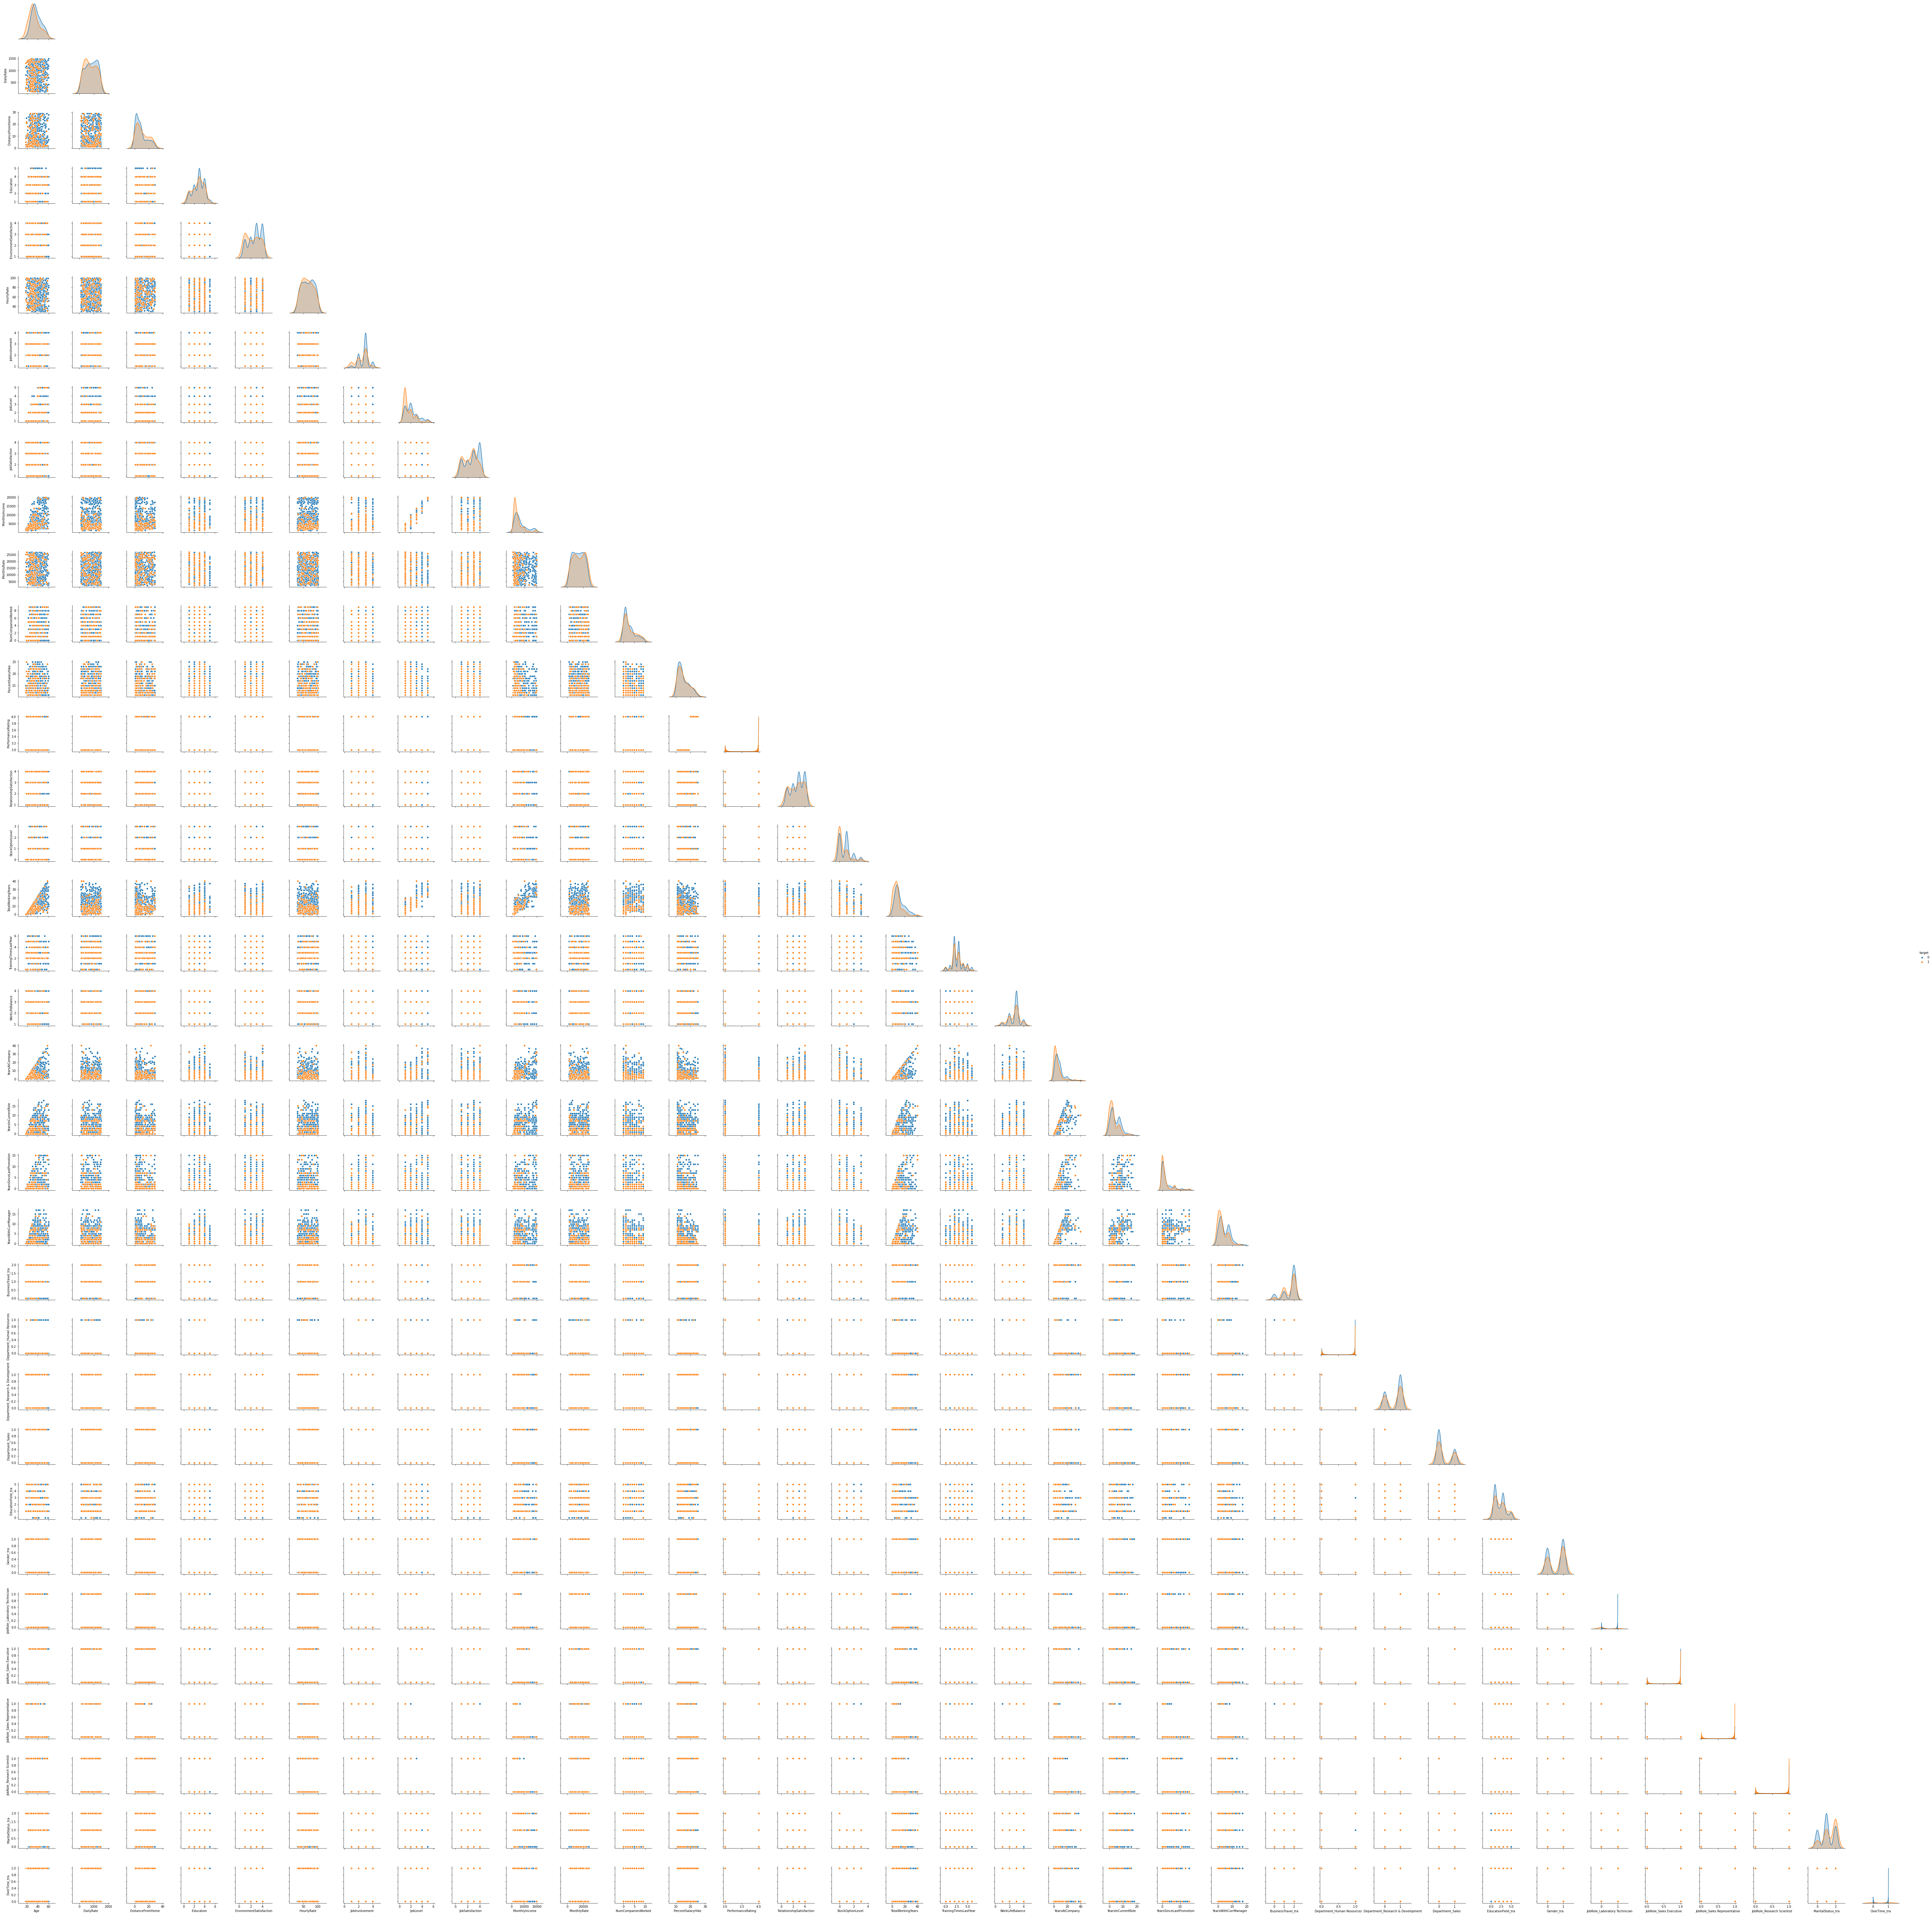

In [425]:
sns.pairplot(train_data, hue = 'target', corner=True)

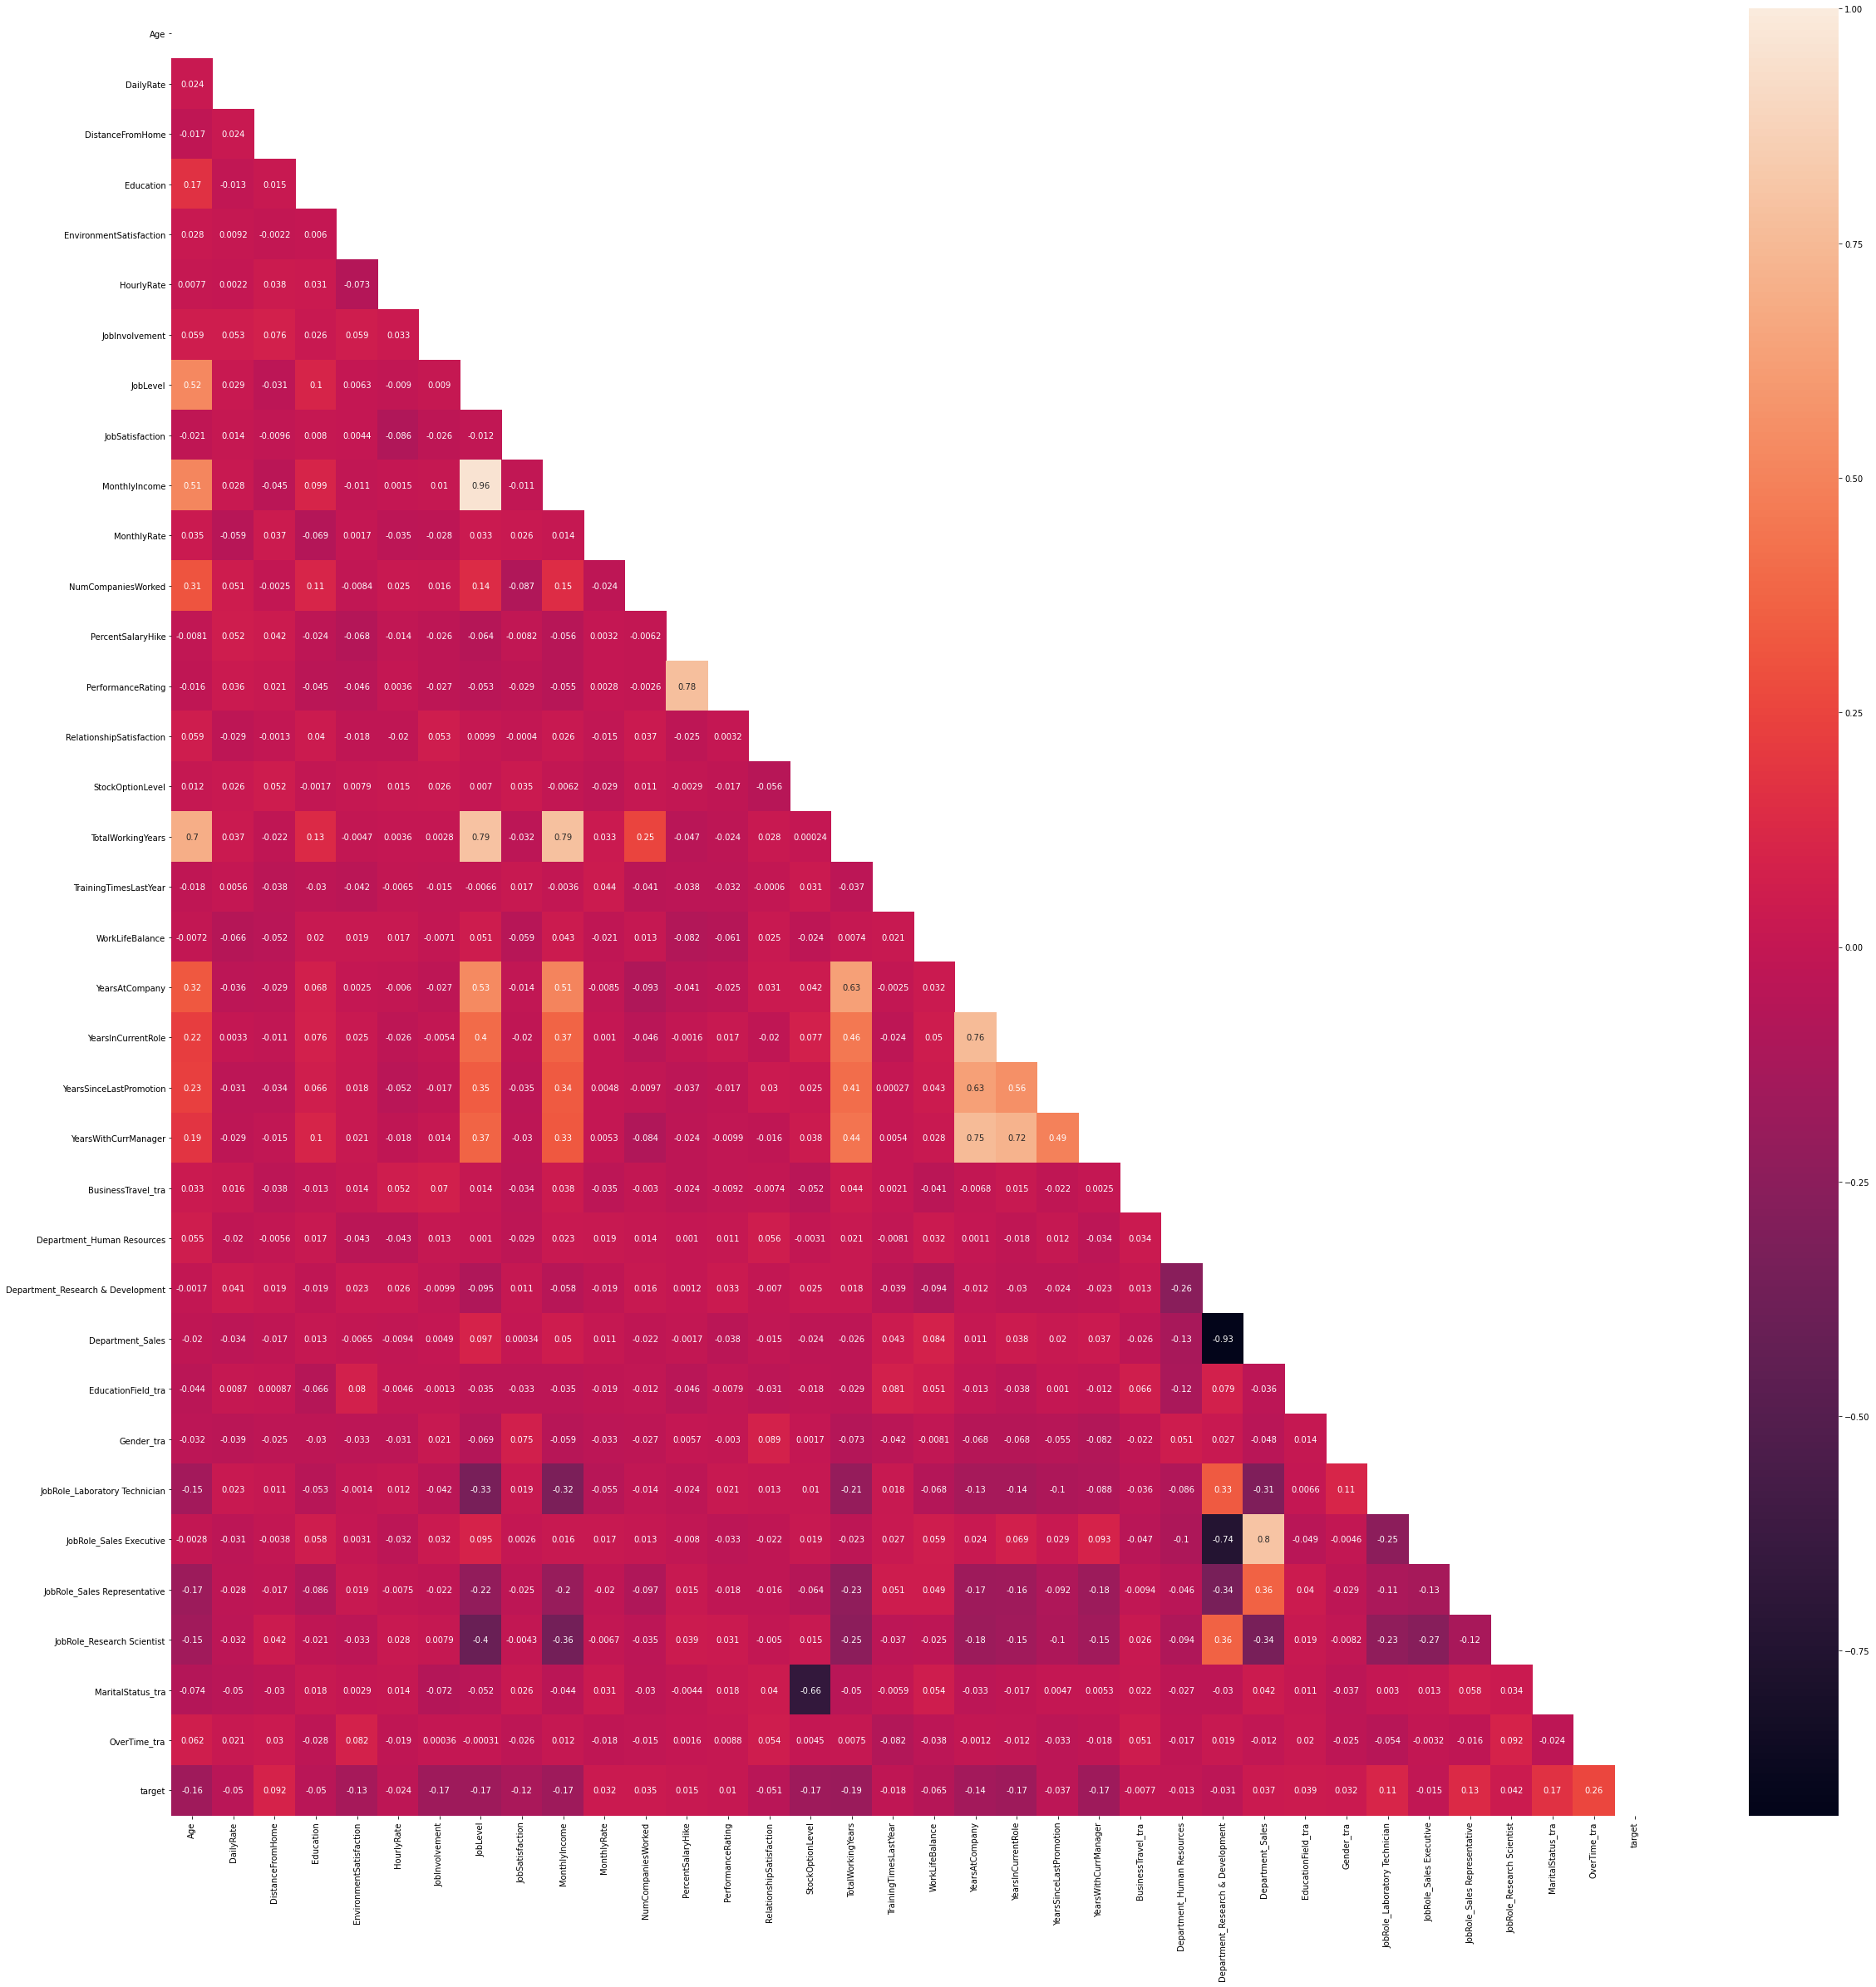

In [53]:
corr = train_data.corr()
plt.figure(figsize=(40,40))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask, annot=True)



1.   Monthly income and job level are highly correlated. so  drop one of them. i will drop monthly income.
2.   Pefformance rating and precent salary hike is also highly related.i drop precent salary hike.
3. Droppiing total years of working
4.  Amoung YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager corelatted highly amoung themesef. So keeping only one
5. Marital status and stock option level has highly negative corelation. so I drop stock option level.
6. ALso dropping Job sales executive and department of research and 
development


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X_train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
X_pca = pca.transform(X_train[['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])

In [55]:
y_train.corr(pd.Series(X_pca.reshape((-1))))

-0.006061770717614255

This is not useful. using one of them is better than applying pca to them

In [0]:
train_data = train_data.drop(columns=['YearsSinceLastPromotion','YearsWithCurrManager', 'TotalWorkingYears','MonthlyIncome','PercentSalaryHike', 'Department_Sales','StockOptionLevel','Department_Research & Development','JobRole_Sales Executive'])

In [57]:
from sklearn import preprocessing 
x = train_data.drop(columns=['target']).iloc[:, :].values 
Standardisation = preprocessing.StandardScaler() 
xstd = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", xstd) 


After Standardisation : 
 [[-0.21667181 -0.44475796 -0.65420735 ... -0.50303954 -0.14491964
  -0.64027224]
 [ 0.8353319   1.10496966 -0.65420735 ... -0.50303954 -1.49860086
   1.56183563]
 [ 0.0989293  -1.03571422 -0.0429793  ... -0.50303954 -0.14491964
  -0.64027224]
 ...
 [-0.63747329  0.39631257 -1.02094418 ... -0.50303954 -0.14491964
  -0.64027224]
 [-0.32187218  0.71998985 -0.16522491 ... -0.50303954 -0.14491964
  -0.64027224]
 [-1.16347515 -0.10391597  2.40193291 ... -0.50303954 -1.49860086
  -0.64027224]]


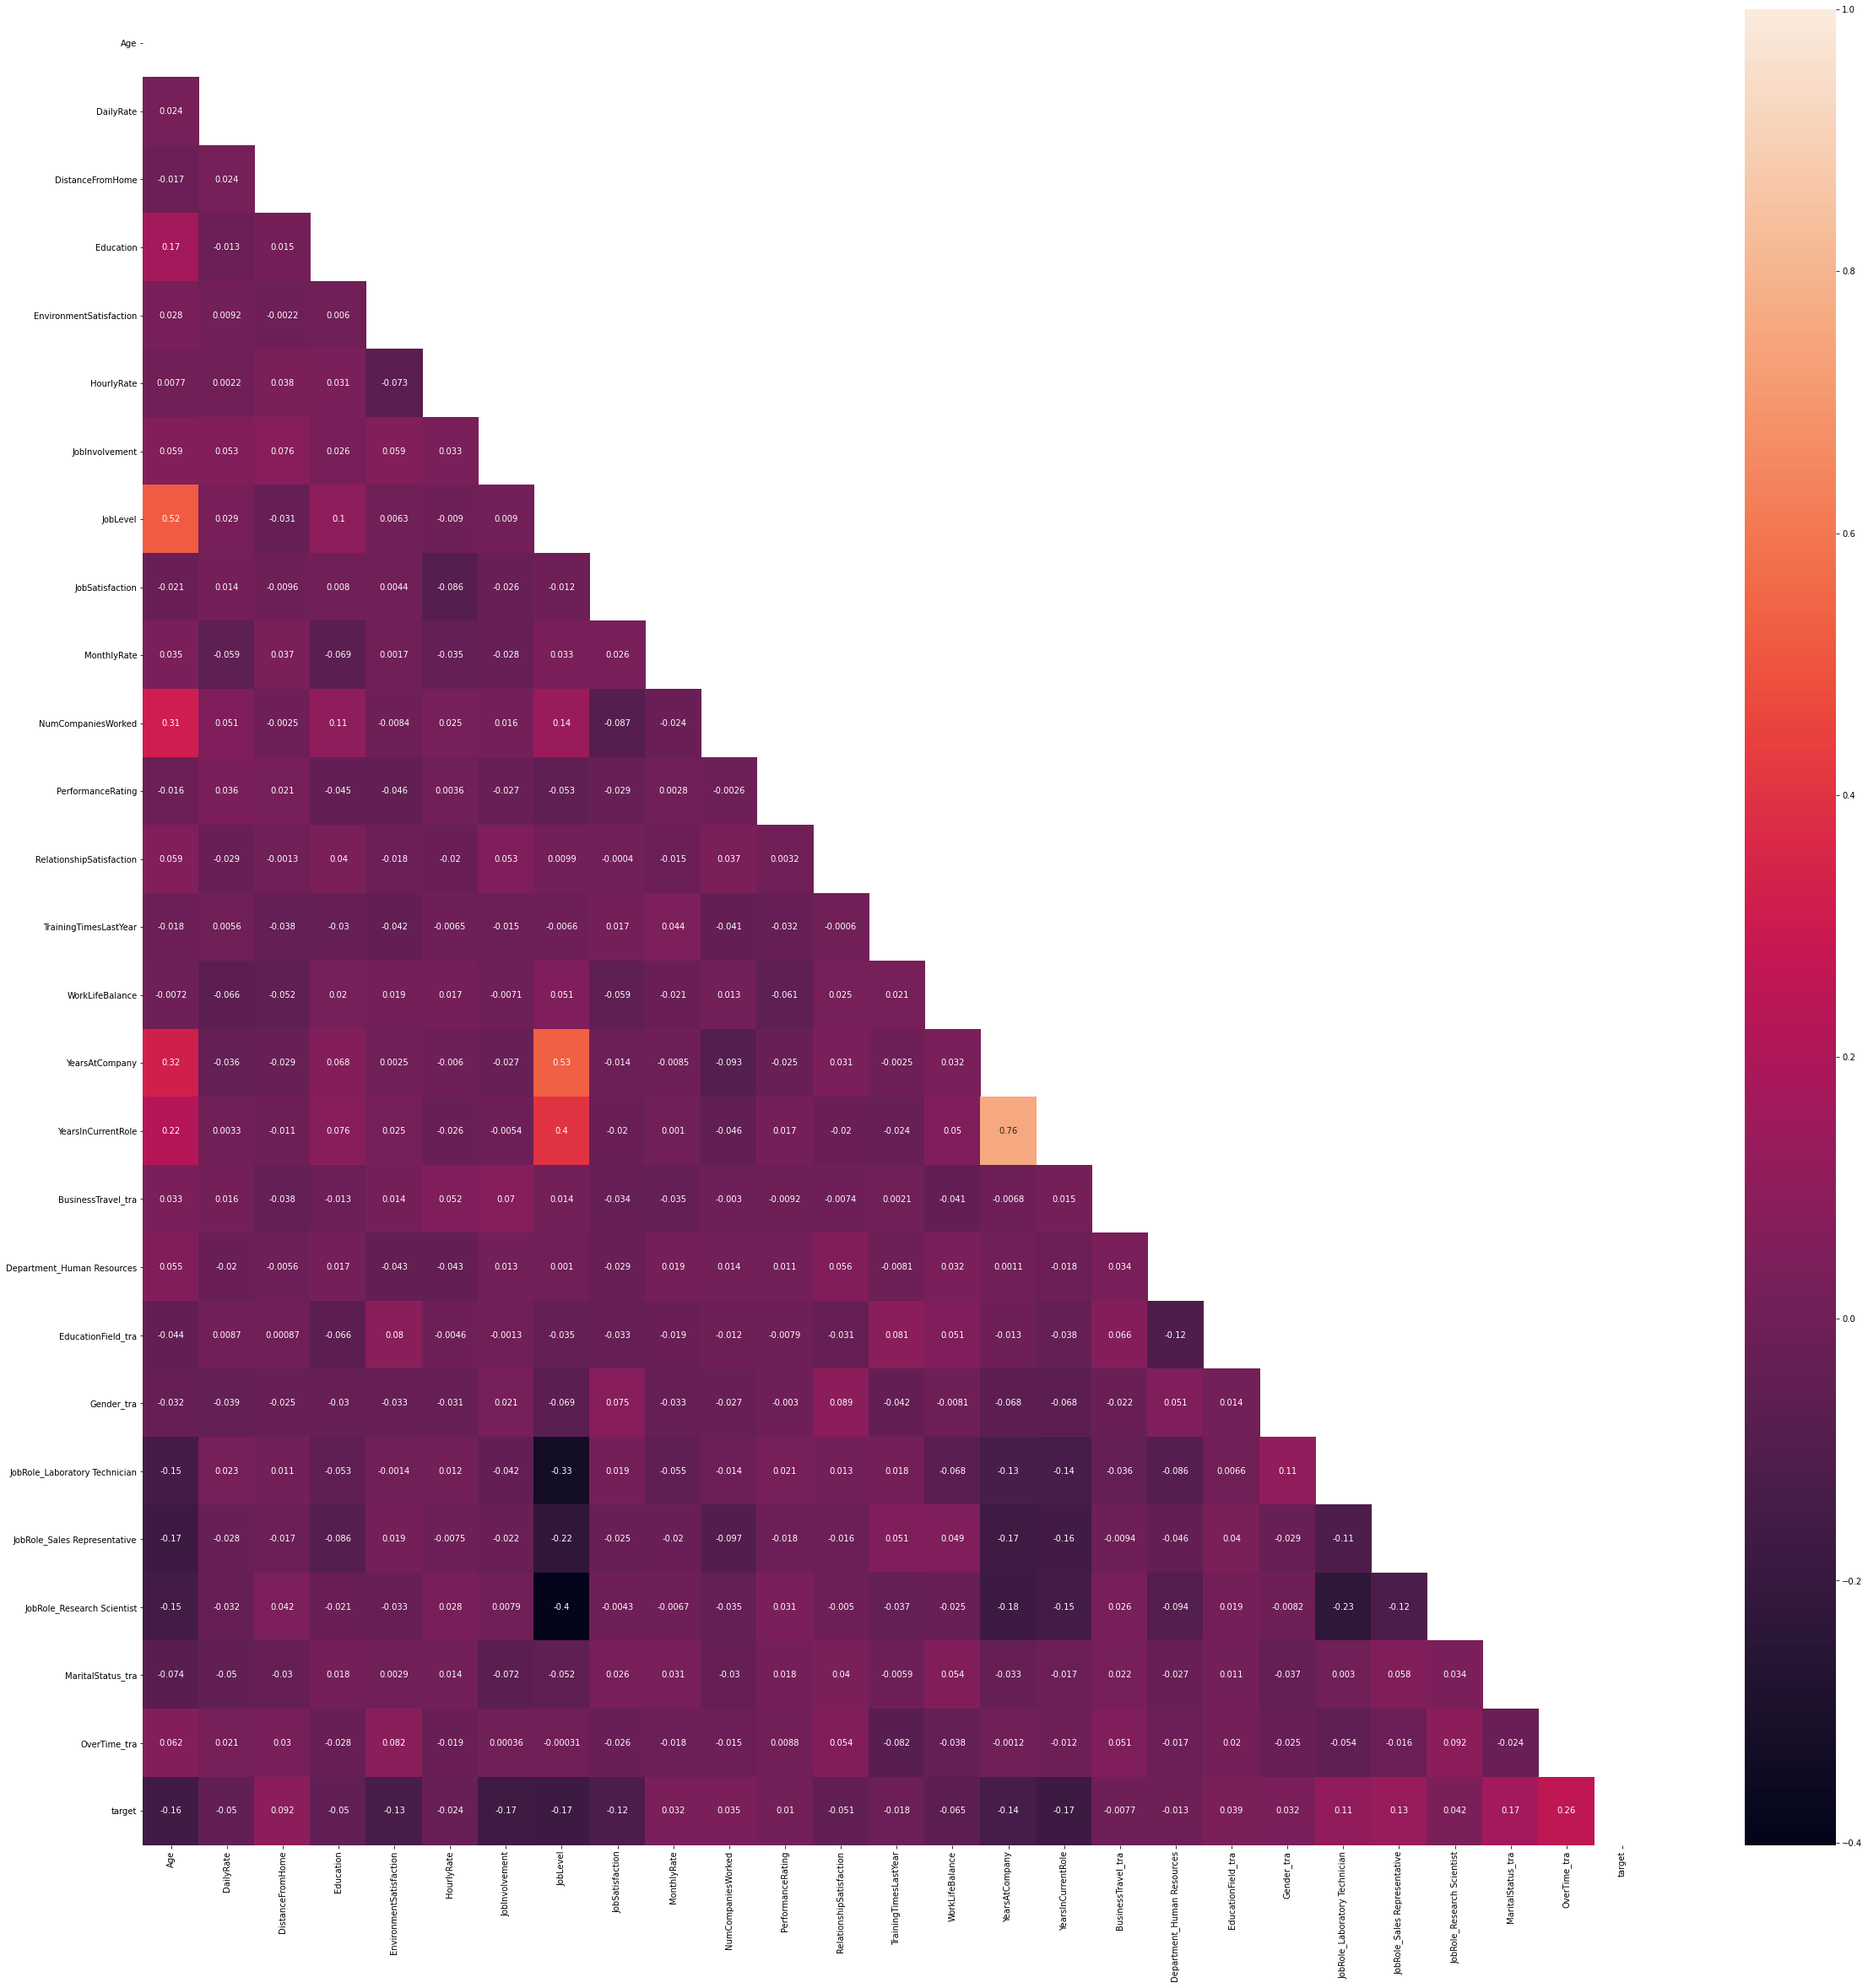

In [58]:
corr = train_data.corr()
plt.figure(figsize=(40,40))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask, annot=True)

Feature: 0, Score: 0.09945
Feature: 1, Score: 0.07331
Feature: 2, Score: 0.06325
Feature: 3, Score: 0.02376
Feature: 4, Score: 0.04068
Feature: 5, Score: 0.05410
Feature: 6, Score: 0.04865
Feature: 7, Score: 0.05673
Feature: 8, Score: 0.03244
Feature: 9, Score: 0.07597
Feature: 10, Score: 0.04282
Feature: 11, Score: 0.00801
Feature: 12, Score: 0.02935
Feature: 13, Score: 0.02958
Feature: 14, Score: 0.02873
Feature: 15, Score: 0.07743
Feature: 16, Score: 0.02661
Feature: 17, Score: 0.01496
Feature: 18, Score: 0.00166
Feature: 19, Score: 0.02654
Feature: 20, Score: 0.00957
Feature: 21, Score: 0.00993
Feature: 22, Score: 0.00857
Feature: 23, Score: 0.01099
Feature: 24, Score: 0.03485
Feature: 25, Score: 0.07206


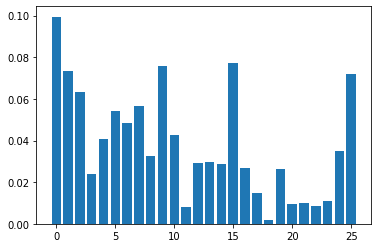

In [432]:
# define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fit the model
model.fit(train_data.drop(columns=['target']),y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: -0.03504
Feature: 1, Score: -0.00029
Feature: 2, Score: 0.04674
Feature: 3, Score: -0.00236
Feature: 4, Score: -0.01407
Feature: 5, Score: -0.00315
Feature: 6, Score: -0.01163
Feature: 7, Score: -0.01083
Feature: 8, Score: -0.01391
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.01777
Feature: 11, Score: 0.00034
Feature: 12, Score: -0.00542
Feature: 13, Score: -0.00264
Feature: 14, Score: -0.00468
Feature: 15, Score: -0.04268
Feature: 16, Score: -0.03984
Feature: 17, Score: -0.00019
Feature: 18, Score: -0.00017
Feature: 19, Score: 0.00452
Feature: 20, Score: 0.00130
Feature: 21, Score: 0.00358
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00054
Feature: 24, Score: 0.01161
Feature: 25, Score: 0.01232


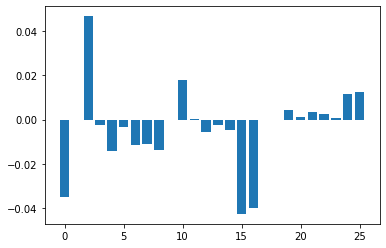

In [433]:
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()
# fit the model
model.fit(train_data.drop(columns=['target']),y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.04668
Feature: 1, Score: 0.03494
Feature: 2, Score: 0.03862
Feature: 3, Score: 0.04397
Feature: 4, Score: 0.04478
Feature: 5, Score: 0.02816
Feature: 6, Score: 0.04900
Feature: 7, Score: 0.09332
Feature: 8, Score: 0.05052
Feature: 9, Score: 0.03063
Feature: 10, Score: 0.03186
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.03160
Feature: 13, Score: 0.02795
Feature: 14, Score: 0.04007
Feature: 15, Score: 0.05637
Feature: 16, Score: 0.04374
Feature: 17, Score: 0.02891
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.02838
Feature: 20, Score: 0.02935
Feature: 21, Score: 0.02736
Feature: 22, Score: 0.02737
Feature: 23, Score: 0.03425
Feature: 24, Score: 0.04781
Feature: 25, Score: 0.08435


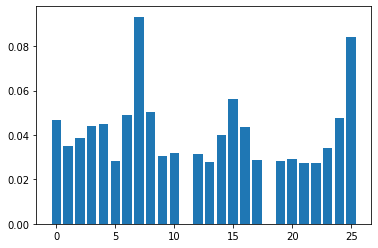

In [434]:

from xgboost import XGBClassifier

model = XGBClassifier()
# fit the model
model.fit(train_data.drop(columns=['target']),y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.08867
Feature: 1, Score: 0.04553
Feature: 2, Score: 0.05142
Feature: 3, Score: 0.03329
Feature: 4, Score: 0.04331
Feature: 5, Score: 0.05108
Feature: 6, Score: 0.04121
Feature: 7, Score: 0.08330
Feature: 8, Score: 0.03683
Feature: 9, Score: 0.08014
Feature: 10, Score: 0.05411
Feature: 11, Score: 0.01328
Feature: 12, Score: 0.01234
Feature: 13, Score: 0.01855
Feature: 14, Score: 0.05776
Feature: 15, Score: 0.05894
Feature: 16, Score: 0.01782
Feature: 17, Score: 0.02031
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.03248
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01041
Feature: 22, Score: 0.01902
Feature: 23, Score: 0.01329
Feature: 24, Score: 0.05079
Feature: 25, Score: 0.06612


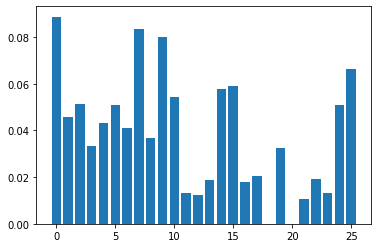

In [435]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

model = DecisionTreeRegressor()
# fit the model
model.fit(train_data.drop(columns=['target']),y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.00049
Feature: 1, Score: 0.02774
Feature: 2, Score: -0.00049
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00146
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.04185
Feature: 10, Score: -0.00024
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000


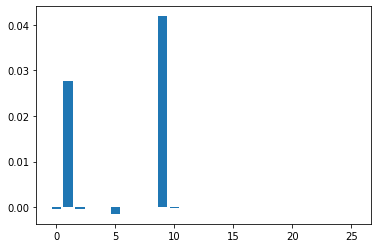

In [436]:

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance


model = KNeighborsClassifier()
# fit the model
model.fit(xstd,y_train)
# perform permutation importance
results = permutation_importance(model, xstd,y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Preparing test data
Applying the same transforms (which was applied to training data)

In [0]:
busi_tra = busi.transform(X_test["BusinessTravel"])
X_test["BusinessTravel_tra"] = busi_tra.copy()
X_test = X_test.drop(columns=["BusinessTravel"]) 

cat_Dep = pd.get_dummies(X_test['Department'], prefix='Department')
X_test = pd.concat([X_test, cat_Dep], axis=1)
X_test = X_test.drop(columns=["Department"]) 


educ_tra = educ.transform(X_test["EducationField"])
X_test["EducationField_tra"] = educ_tra.copy()
X_test = X_test.drop(columns=["EducationField"]) 

gend_tra = gend.transform(X_test["Gender"])
X_test["Gender_tra"] = gend_tra.copy()
X_test = X_test.drop(columns=["Gender"]) 

cat_job = pd.get_dummies(X_test['JobRole'], prefix='JobRole')
X_test = pd.concat([X_test, cat_job[['JobRole_Laboratory Technician', 'JobRole_Sales Executive', 'JobRole_Sales Representative','JobRole_Research Scientist']]], axis=1)
X_test = X_test.drop(columns=["JobRole"]) 

mari_tra = mari.transform(X_test["MaritalStatus"])
X_test["MaritalStatus_tra"] = mari_tra.copy()
X_test = X_test.drop(columns=["MaritalStatus"])

over_tra = over.transform(X_test["OverTime"])
X_test["OverTime_tra"] = over_tra.copy()
X_test = X_test.drop(columns=["OverTime"]) 

X_test = X_test.drop(columns=['YearsSinceLastPromotion','YearsWithCurrManager', 'TotalWorkingYears','MonthlyIncome','PercentSalaryHike', 'Department_Sales','StockOptionLevel','Department_Research & Development','JobRole_Sales Executive'])
xd = X_test.iloc[:, :].values
xstd_test = Standardisation.fit_transform(xd) ;

Trying various algorithems
# Decision Tree

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
plt.style.use('ggplot')      

# grid search
model = DecisionTreeClassifier()
max_depth = [3,4,5,6,7]
max_features = [5,7,9,11,13,15,17]

param_grid = dict(max_depth=max_depth, max_features=max_features)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(xstd, y_train)

# summarize results
print(); print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.843082 using {'max_depth': 3, 'max_features': 11}


In [87]:
from sklearn.tree import DecisionTreeClassifier
# Make a decision tree and train
model = DecisionTreeClassifier(max_depth = 3,random_state=123,max_features=11)
model.fit(xstd, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [88]:
print(f'Decision tree has {model.tree_.node_count} nodes with maximum depth {model.tree_.max_depth}.')

Decision tree has 15 nodes with maximum depth 3.


In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Applying classifier on train (seen) set
predictions = model.predict(xstd)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

84.55 %


In [90]:
# Applying classifier on test (unseen) set
predictions = tree.predict(xstd_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

80.1 %


In [91]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[160  12]
 [ 29   5]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       172
           1       0.29      0.15      0.20        34

    accuracy                           0.80       206
   macro avg       0.57      0.54      0.54       206
weighted avg       0.76      0.80      0.77       206



The ROC value is  0.6853625170998632


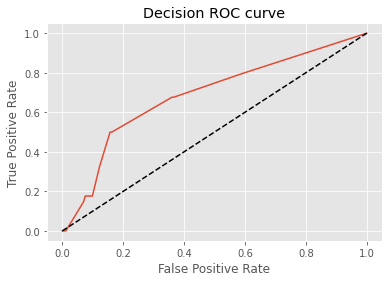

In [92]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve  
probs = tree.predict_proba(xstd_test)  
probs = probs[:, 1]  
# Calculate roc auc
roc_value = roc_auc_score(y_test, probs)
print('The ROC value is ',roc_value)
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision ROC curve')
# show the plot
plt.show()

# XGBoost

In [94]:
from xgboost import XGBClassifier

model = XGBClassifier()
n_estimators = [ 500, 600, 700, 800, 900]
learning_rate = [0.003, 0.01, 0.03,0.1]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(xstd, y_train)

# summarize results
print(); print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.359395 using {'learning_rate': 0.01, 'n_estimators': 600}


In [99]:
# Instantiating the classifier and fitting it 
xgb_clf = XGBClassifier(learning_rate=0.01,n_estimators= 600)
xgb_clf.fit(xstd, y_train)
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(xstd)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

91.73 %


In [100]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(xstd_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

86.89 %


In [101]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[169   3]
 [ 24  10]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       172
           1       0.77      0.29      0.43        34

    accuracy                           0.87       206
   macro avg       0.82      0.64      0.68       206
weighted avg       0.86      0.87      0.84       206



The ROC value is  0.7657318741450069


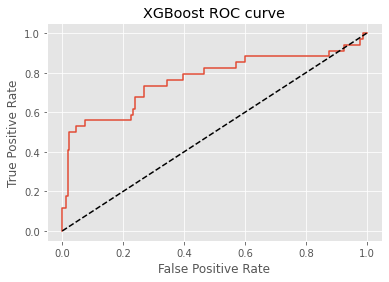

In [102]:
probs = xgb_clf.predict_proba(xstd_test)  
probs = probs[:, 1]  
# Calculate roc auc
roc_value = roc_auc_score(y_test, probs)
print('The ROC value is ',roc_value)
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
model = RandomForestClassifier()
param_grid = { 'max_depth': [4, 6, 8,10,12],'n_estimators': [200,250,300,350]}
search = GridSearchCV(model, param_grid, cv=kfold,n_jobs=-1,scoring="neg_log_loss",)
search.fit(xstd, y_train);

In [535]:
print(); print("Best: %f using %s" % (search.best_score_, search.best_params_))


Best: -0.369891 using {'max_depth': 10, 'n_estimators': 250}


In [554]:
model = RandomForestClassifier(n_estimators=250, 
                               max_depth= 10)
# Fit on training data
model.fit(xstd, y_train);
# Applying classifier on train (seen) set
predictions = model.predict(xstd)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

99.27 %


In [555]:
# Applying classifier on test (unseen) set
predictions = model.predict(xstd_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.44 %


In [556]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[171   1]
 [ 29   5]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.83      0.15      0.25        34

    accuracy                           0.85       206
   macro avg       0.84      0.57      0.58       206
weighted avg       0.85      0.85      0.81       206



The ROC value is  0.7665868673050615


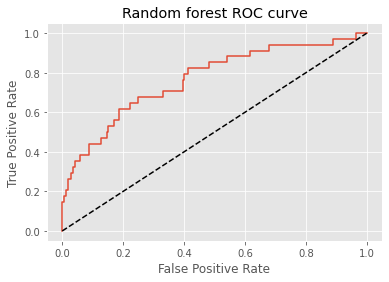

In [558]:
rf_probs = model.predict_proba(xstd_test)  
rf_probs = rf_probs[:, 1] 
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print('The ROC value is ',roc_value)
# plot roc auc
fper, tper, thresholds = roc_curve(y_test, rf_probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC curve')
# show the plot
plt.show()

# kNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {'n_neighbors':[3,5,11,19],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhatten']}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)               
gs = GridSearchCV(KNeighborsClassifier(),
                  grid_params,
                  verbose=1,
                  cv = kfold,
                  n_jobs=-1)
gs_res = gs.fit(xstd, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished


In [104]:
print(); print("Best: %f using %s" % (gs.best_score_, gs.best_params_))


Best: 0.840643 using {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [105]:
model = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 11, weights= 'uniform')
# Fit on training data
model.fit(xstd, y_train);
# Applying classifier on train (seen) set
predictions = model.predict(xstd)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

85.16 %


In [106]:
# Applying classifier on test (unseen) set
predictions = model.predict(xstd_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.44 %


In [107]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[172   0]
 [ 30   4]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       172
           1       1.00      0.12      0.21        34

    accuracy                           0.85       206
   macro avg       0.93      0.56      0.57       206
weighted avg       0.88      0.85      0.80       206



The ROC value is  0.7559849521203831


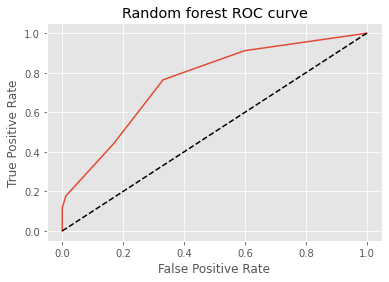

In [108]:
rf_probs = model.predict_proba(xstd_test)  
rf_probs = rf_probs[:, 1] 
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print('The ROC value is ',roc_value)
# plot roc auc
fper, tper, thresholds = roc_curve(y_test, rf_probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC curve')
# show the plot
plt.show()